# Comparing RSI, DMAC, RSI+DMAC and Buy & Hold Strategies on the Top 10 Most Traded Stocks

This notebook analyzes the performance of three trading strategies—RSI, Double Moving Average Crossover (DMAC), and their combination—against the classic Buy & Hold approach. Using Bayesian Optimization for parameter tuning, we tested each strategy on 10 of the most actively traded stocks from 2020 to mid-2025, starting with $10 per trade. The results include average and total returns, trade frequency, and how often each strategy ranked first.

## Imports

In [70]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Prepare Data

In [71]:
# Load all result CSVs from the "results" folder
results_folder = "results"
all_results = []

for file in os.listdir(results_folder):
    if file.endswith(".csv"):
        ticker = file.replace(".csv", "")
        df = pd.read_csv(os.path.join(results_folder, file))
        df['Ticker'] = ticker
        all_results.append(df)

df_all = pd.concat(all_results, ignore_index=True)

# Ensure numeric columns
df_all['Final Value'] = pd.to_numeric(df_all['Final Value'], errors='coerce')
df_all['Return (%)'] = pd.to_numeric(df_all['Return (%)'], errors='coerce')
df_all['Trades'] = pd.to_numeric(df_all['Trades'], errors='coerce')

df_all.head()

,Strategy,Final Value,Return (%),Trades,Ticker
0,DMAC,5.404075,-45.959246,4,AAL
1,RSI Mean Reversion,8.459864,-15.401360,12,AAL
2,Combined RSI + DMAC,9.005618,-9.943820,12,AAL
3,Buy & Hold,8.392857,-16.071428,0,AAL
4,DMAC,7.899800,-21.002000,6,AMD


## Calculate Averages

In [72]:
mean_summary = df_all.groupby("Strategy").mean(numeric_only=True).round(2).reset_index()
mean_summary

,Strategy,Final Value,Return (%),Trades
0,Buy & Hold,23.36,133.56,0.0
1,Combined RSI + DMAC,10.69,6.94,30.3
2,DMAC,12.75,27.47,6.4
3,RSI Mean Reversion,10.80,8.04,31.9


## Calculate Aggregates

In [73]:
aggr_summary = df_all.groupby("Strategy").sum(numeric_only=True).round(2).reset_index()
aggr_summary

,Strategy,Final Value,Return (%),Trades
0,Buy & Hold,233.56,1335.62,0
1,Combined RSI + DMAC,106.94,69.36,303
2,DMAC,127.47,274.74,64
3,RSI Mean Reversion,108.04,80.43,319


## Average Final Value By Strategy

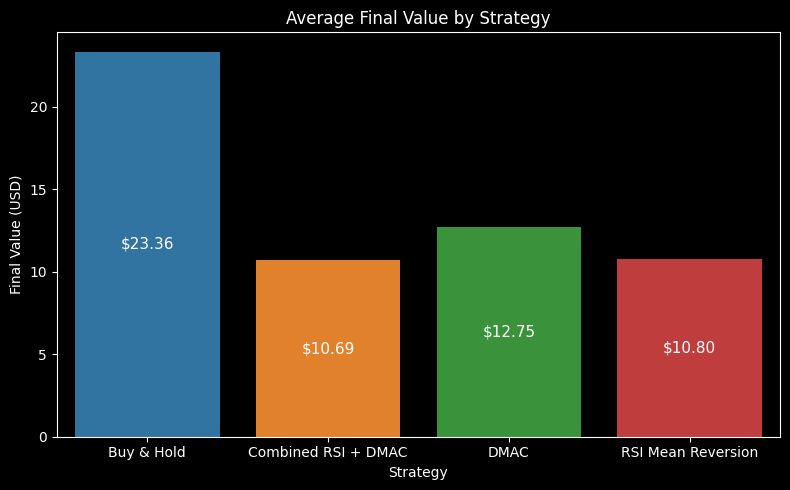

In [74]:
plt.figure(figsize=(8, 5))
sns.barplot(data=mean_summary, x="Strategy", y="Final Value", hue="Strategy", palette="tab10")
    
for i, val in enumerate(mean_summary['Final Value']):
    plt.text(i, val / 2, f"${val:.2f}", ha='center', va='center', fontsize=11, color='white')

plt.title("Average Final Value by Strategy")
plt.ylabel("Final Value (USD)")
plt.tight_layout()
plt.savefig("avg_final_value.png", dpi=300)
plt.show()

## Average Return (%) by Strategy

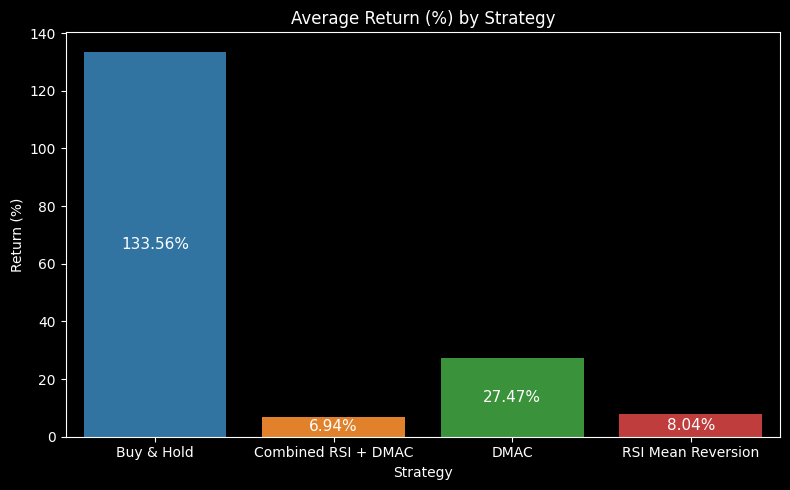

In [75]:
plt.figure(figsize=(8, 5))
sns.barplot(data=mean_summary, x="Strategy", y="Return (%)", hue="Strategy", palette="tab10")

for i, val in enumerate(mean_summary['Return (%)']):
    plt.text(i, val / 2, f"{val:.2f}%", ha="center", va="center", fontsize=11)

plt.title("Average Return (%) by Strategy")
plt.ylabel("Return (%)")
plt.tight_layout()
plt.savefig("avg_return_percent.png", dpi=300)
plt.show()

## Average Number of Trades by Strategy

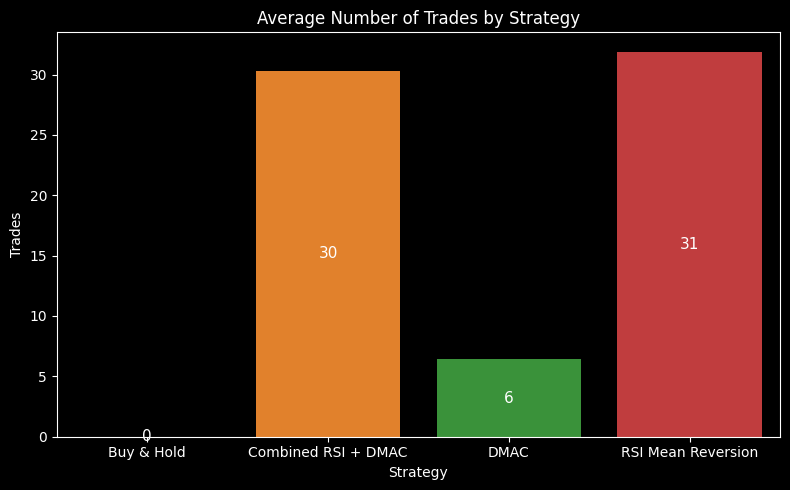

In [76]:
plt.figure(figsize=(8, 5))
sns.barplot(data=mean_summary, x="Strategy", y="Trades", hue="Strategy", palette="tab10")

for i, val in enumerate(mean_summary['Trades']):
    plt.text(i, val / 2, f"{int(val)}", ha='center', va='center', fontsize=11)

plt.title("Average Number of Trades by Strategy")
plt.ylabel("Trades")
plt.tight_layout()
plt.savefig("avg_trades.png", dpi=300)
plt.show()

## Strategy Wins

In [77]:
# For each ticker, find the strategy with the highest return
top_strategies = df_all.loc[df_all.groupby("Ticker")['Return (%)'].idxmax()]
win_counts = top_strategies['Strategy'].value_counts().sort_values(ascending=False).reset_index()
win_counts.columns = ['Strategy', 'Wins']
win_counts

,Strategy,Wins
0,Buy & Hold,5
1,Combined RSI + DMAC,3
2,RSI Mean Reversion,2


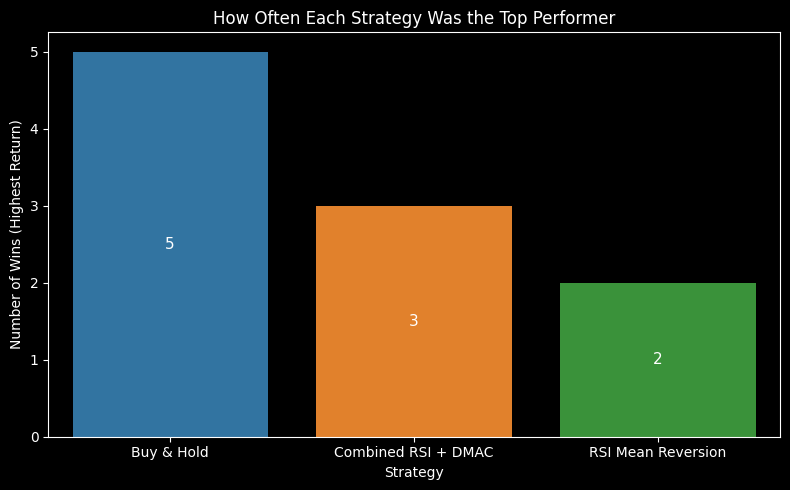

In [78]:
plt.figure(figsize=(8, 5))
sns.barplot(data=win_counts, x="Strategy", y="Wins", hue="Strategy", palette="tab10")

for i, val in enumerate(win_counts['Wins']):
    plt.text(i, val / 2, f"{val}", ha='center', va='center', fontsize=11)

plt.title("How Often Each Strategy Was the Top Performer")
plt.ylabel("Number of Wins (Highest Return)")
plt.tight_layout()
plt.savefig("strategy_win_counts.png", dpi=300)
plt.show()

## Total Final Value by Strategy

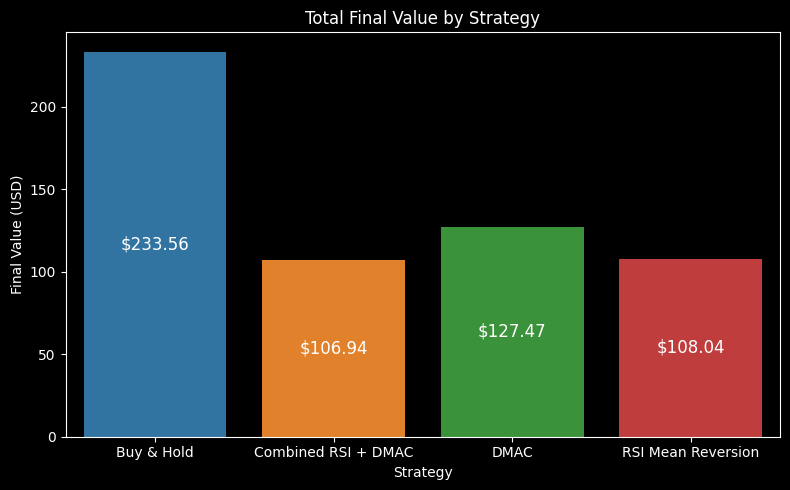

In [79]:
plt.figure(figsize=(8, 5))
sns.barplot(data=aggr_summary, x="Strategy", y="Final Value", hue="Strategy", palette="tab10")

for i, val in enumerate(aggr_summary["Final Value"]):
    plt.text(i, val / 2, f"${val:.2f}", ha="center", va="center", fontsize=12)

plt.title("Total Final Value by Strategy")
plt.ylabel("Final Value (USD)")
plt.tight_layout()
plt.savefig("total_final_value.png", dpi=300)
plt.show()

## Total Return (%) by Strategy

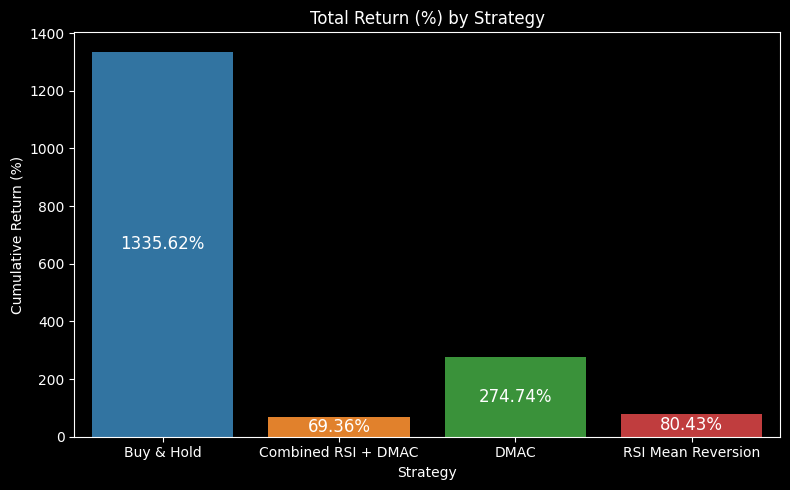

In [80]:
plt.figure(figsize=(8, 5))
sns.barplot(data=aggr_summary, x="Strategy", y="Return (%)", hue="Strategy", palette="tab10")

for i, val in enumerate(aggr_summary["Return (%)"]):
    plt.text(i, val / 2, f"{val:.2f}%", ha="center", va="center", fontsize=12)

plt.title("Total Return (%) by Strategy")
plt.ylabel("Cumulative Return (%)")
plt.tight_layout()
plt.savefig("total_return_percent.png", dpi=300)
plt.show()

## Total Number of Trades by Strategy

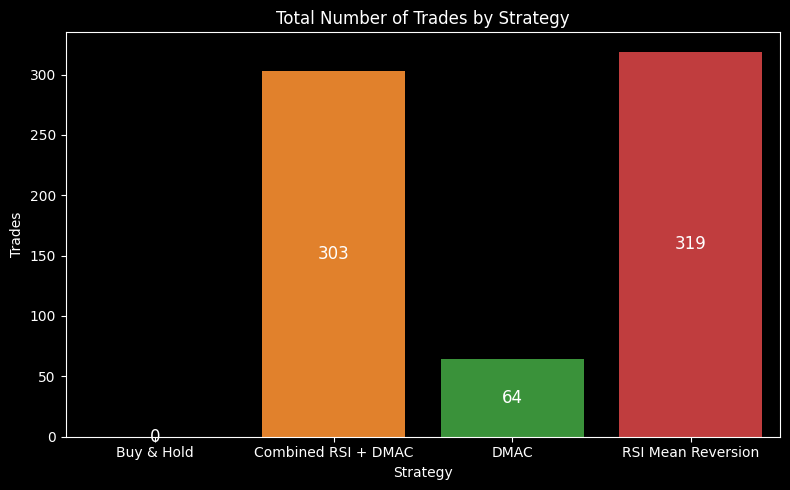

In [81]:
plt.figure(figsize=(8, 5))
sns.barplot(data=aggr_summary, x="Strategy", y="Trades", hue="Strategy", palette="tab10")

for i, val in enumerate(aggr_summary["Trades"]):
    plt.text(i, val / 2, f"{int(val)}", ha="center", va="center", fontsize=12)

plt.title("Total Number of Trades by Strategy")
plt.ylabel("Trades")
plt.tight_layout()
plt.savefig("total_trades.png", dpi=300)
plt.show()